# THIRD PROJECT

## GDP and Number of Maternal Death
The causes of maternal death vary considerably and depend on when mothers die. These data are based on a report from maternal mortality review committees. During pregnancy, hemorrhage and cardiovascular conditions are the leading causes of death. At birth and shortly after, infection is the leading cause.

The issue of Number of maternal death is growing concern worldwide. Also The wealth of a country may be an indicator of how well the country is able to make provision for its citizens. This may impact the availability of certain amenities and access to maternity care. To confirm this,I want analyse the correlation between the GDP of countries and how it can affect pregnant women who should have access to health and maternity care which in the long term can determine the number of women who survived during child birth or does who died. 

It will be beneficial to know the relatiionship between the GDP of a country and the Number of maternal death of its inhabitants.

The following analysis checks whether there is any correlation between the GDP of a country in 2017 and Number of maternal death in the country in 2017.

## Problem statement
To what extent do the ten countries with the highest coincide with the ten countries with low Number of maternal death in 2017?

Which are the two countries in the right half of the plot (higher GDP) low maternal maternal death?

What factors could explain their lower maternal death compared to countries with similar GDP ? 

Redo the analysis using the countries’ GDP per capita (i.e. per inhabitant) instead of their total GDP. If you’ve done the workbook task, you already have a column with the population data. 

Redo the analysis using the indicator suggested at the end of the project notebook.
Create your own project Create a completely new project and choose another two of the hundreds of World Bank indicators and see if there is any correlation between them. If there is a choice of similar indicators, choose one that leads to meaningful comparisons between countries.

Look at the results you obtained and take a few moments to assess how they differ from mine.

## Getting the data

Two datasets of the World Bank are considered. One dataset, available at http://data.worldbank.org/indicator/NY.GDP.MKTP.CD, lists the GDP of the world's countries in current US dollars, for various years. The use of a common currency allows us to compare GDP values across countries. The other dataset, available at http://data.worldbank.org/indicator/SP.DYN.LE00.IN, lists the life expectancy of the world's countries. The datasets were downloaded as CSV files in June 2021.

In [192]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

GDPPC_INDICATOR = 'NY.GDP.PCAP.CD'
MDR_INDICATOR = 'SH.MMR.DTHS'

In [193]:
if pd.__version__.startswith('0.23'):
    # this solves an incompatibility between pandas 0.23 and datareader 0.6
    # taken from https://stackoverflow.com/questions/50394873/
    core.common.is_list_like = api.types.is_list_like

import numpy as np
from pandas_datareader.wb import download

YEAR = 2017
gdppcWB = download(indicator=GDPPC_INDICATOR, country='all', start=YEAR, end=YEAR)
mdrWB = download(indicator=MDR_INDICATOR, country='all', start=YEAR, end=YEAR)
mdrWB.head()

,,SH.MMR.DTHS
country,year,
Arab World,2017,16000.0
Caribbean small states,2017,100.0
Central Europe and the Baltics,2017,80.0
Early-demographic dividend,2017,97000.0
East Asia & Pacific,2017,21000.0


A DataFrame ideally should have integer index, however the downloaded dataframe has descriptive row names instead of integers etc. In other words, the dataframe's index is given by the country and year instead of integers. Hence the second step was to reset the index.

In [194]:
#This code would reset the index of the dataframes into the usual form, which was saved to CSV files. 

gdppcReset = gdppcWB.reset_index()
mdrReset = mdrWB.reset_index()
mdrReset.head()

,country,year,SH.MMR.DTHS
0,Arab World,2017,16000.0
1,Caribbean small states,2017,100.0
2,Central Europe and the Baltics,2017,80.0
3,Early-demographic dividend,2017,97000.0
4,East Asia & Pacific,2017,21000.0


In [195]:
gdppcReset.head()

,country,year,NY.GDP.PCAP.CD
0,Arab World,2017,6108.588220
1,Caribbean small states,2017,9767.970059
2,Central Europe and the Baltics,2017,14244.864479
3,Early-demographic dividend,2017,3555.334594
4,East Asia & Pacific,2017,10467.353916


In [196]:
gdppcReset.tail()

,country,year,NY.GDP.PCAP.CD
259,Virgin Islands (U.S.),2017,35933.669522
260,West Bank and Gaza,2017,3620.360487
261,"Yemen, Rep.",2017,960.528534
262,Zambia,2017,1534.866751
263,Zimbabwe,2017,1548.170056


In [197]:
#gdppcReset.head(60)

In [198]:
#mdrReset.head(60)

In [199]:
mdrReset.head()

,country,year,SH.MMR.DTHS
0,Arab World,2017,16000.0
1,Caribbean small states,2017,100.0
2,Central Europe and the Baltics,2017,80.0
3,Early-demographic dividend,2017,97000.0
4,East Asia & Pacific,2017,21000.0


In [200]:
mdrReset.tail()

,country,year,SH.MMR.DTHS
259,Virgin Islands (U.S.),2017,NaN
260,West Bank and Gaza,2017,39.0
261,"Yemen, Rep.",2017,1400.0
262,Zambia,2017,1300.0
263,Zimbabwe,2017,2100.0


## Cleaning the data

Inspecting the data with `head()` and `tail()` shows that:

1. the first 47 rows are aggregated data, for the Arab World, the Caribbean small states, and other country groups used by the World Bank;
- GDP Per Capita and Number of maternal death are missing for some countries.

The data is therefore cleaned by:
1. removing the first 47 rows;
- dropping rows with missing values.

In [201]:
#This code would drop irrelevant columns and columns with missing values

Countries_GDPPC = gdppcReset[47:].dropna()
Maternal_DR_Countries = mdrReset[47:].dropna()

## Transforming the data

The World Bank reports GDP per capita in US dollars and cents. To make the correlation easier to check I would using the values in US Dollars.

In [202]:
GDP_Per_Capita = 'GDP_Per_Capita($US)'
Countries_GDPPC[GDP_Per_Capita] = Countries_GDPPC[GDPPC_INDICATOR].apply(round)
Countries_GDPPC.head()

,country,year,NY.GDP.PCAP.CD,GDP_Per_Capita($US)
47,Afghanistan,2017,519.884773,520
48,Albania,2017,4531.020806,4531
49,Algeria,2017,4111.294110,4111
50,American Samoa,2017,10823.444804,10823
51,Andorra,2017,38962.880354,38963


In [203]:
COUNTRY = 'country'
Column_header = [COUNTRY,GDP_Per_Capita]
Clean_GDPPC =Countries_GDPPC[Column_header]
Clean_GDPPC.head()

,country,GDP_Per_Capita($US)
47,Afghanistan,520
48,Albania,4531
49,Algeria,4111
50,American Samoa,10823
51,Andorra,38963


The World Bank reports the Numbers of maternal death per year and GDP Per Capita in Current US Dollars,however decimals can be avoided by rounding the numbers.

In [204]:
MaternalMortality = 'Number of Maternal Death (year)'
Maternal_DR_Countries[MaternalMortality] = Maternal_DR_Countries[MDR_INDICATOR].apply(round)
header = [COUNTRY, MaternalMortality]
CleanMDRdata = Maternal_DR_Countries[header]
CleanMDRdata.head()

,country,Number of Maternal Death (year)
47,Afghanistan,7700
48,Albania,5
49,Algeria,1200
52,Angola,3000
53,Antigua and Barbuda,1


## Combining the data

The tables are combined through an inner join on the common 'country' column. 

In [205]:
gdppcVsMMDr =pd.merge(Clean_GDPPC,CleanMDRdata, on=COUNTRY, how='inner')
gdppcVsMMDr.head()

,country,GDP_Per_Capita($US),Number of Maternal Death (year)
0,Afghanistan,520,7700
1,Albania,4531,5
2,Algeria,4111,1200
3,Angola,4096,3000
4,Antigua and Barbuda,15383,1


## Calculating the correlation

To measure if maternal death reduces as GDP increases, the Spearman rank correlation coefficient is used. It is a number from -1 (perfect inverse rank correlation: if one indicator increases, the other decreases) to 1 (perfect direct rank correlation: if one indicator increases, so does the other), with 0 meaning there is no rank correlation. A perfect correlation doesn't imply any cause-effect relation between the two indicators. A p-value below 0.05 means the correlation is statistically significant.

In [206]:
from scipy.stats import spearmanr

GDPPC_Column = gdppcVsMMDr[GDP_Per_Capita]
MMDRateColumn = gdppcVsMMDr[MaternalMortality]
(correlation, pValue) = spearmanr(GDPPC_Column, MMDRateColumn)
print('The correlation is', correlation)
if pValue < 0.05:
    print('Note: This correlation is statistically significant.\n\
      Therefore, there is correlation between an high GDPPC of a country and low maternal death')
else:
    print('Note: This correlation is not statistically significant.\n\
      Therefore there is no correlation between GDPPC and maternal death rate')

The correlation is -0.7041892734020189
Note: This correlation is statistically significant.
      Therefore, there is correlation between an high GDPPC of a country and low maternal death


In [207]:
pValue

3.9927970170259007e-28

In [261]:
gdppcVsMMDr

,country,GDP_Per_Capita($US),Number of Maternal Death (year)
0,Afghanistan,520,7700
1,Albania,4531,5
2,Algeria,4111,1200
3,Angola,4096,3000
4,Antigua and Barbuda,15383,1
...,...,...,...
174,Vietnam,2366,700
175,West Bank and Gaza,3620,39
176,"Yemen, Rep.",961,1400
177,Zambia,1535,1300


The value shows correlation, i.e. the richer the country the lesser the number of maternal death, However there is a need to confirm this with graphs.

## Showing the data
Measures of correlation can be misleading, so it is best to see the overall picture with a scatterplot. The GDP axis uses a logarithmic scale to better display the vast range of GDP values, from a few million to several billion (million of million) pounds.

<AxesSubplot:xlabel='GDP_Per_Capita($US)', ylabel='Number of Maternal Death (year)'>

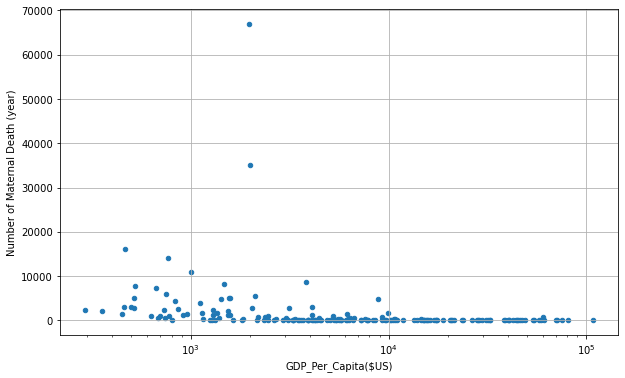

In [236]:
%matplotlib inline
gdppcVsMMDr.plot(x=GDP_Per_Capita, y=MaternalMortality, kind='scatter', grid=True, logx=True, figsize=(10, 6))

<AxesSubplot:xlabel='Number of Maternal Death (year)', ylabel='GDP_Per_Capita($US)'>

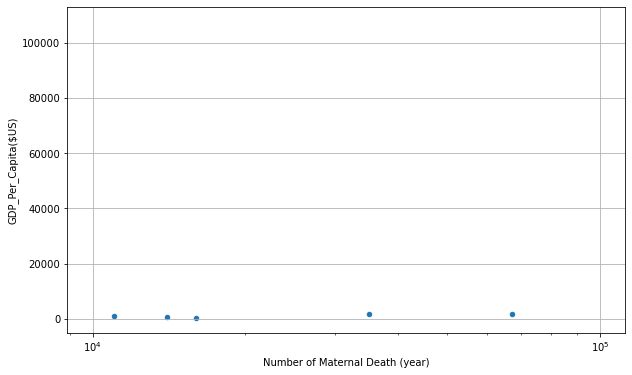

In [263]:
#- Swap the axes of the scatterplot, i.e. show the GDP in the y axis and the life expectancy in the x axis.

%matplotlib inline
gdppcVsMMDr.plot(y=GDP_Per_Capita, x=MaternalMortality, kind='scatter', grid=True, logx=True, figsize=(10, 6))

In [ ]:
The graph shows clear correlation between GDP oer capita and number of maternal death, however there are outliers.

In [248]:
#This code would check for my outliers to see if dropping them can give a better view of the dataset.

gdppcVsMMDr.sort_values([MaternalMortality],ascending=False)

,country,GDP_Per_Capita($US),Number of Maternal Death (year)
119,Nigeria,1969,67000
73,India,1982,35000
37,"Congo, Dem. Rep.",467,16000
54,Ethiopia,769,14000
157,Tanzania,1005,11000
...,...,...,...
96,Luxembourg,107627,0
72,Iceland,71311,0
109,Montenegro,7784,0
102,Malta,28092,0


Nigeria and India have extremely high numbers of maternal death despite the fair GDP per capita. 

In [249]:
#gdppcVsMMDr.tail(40)

<AxesSubplot:xlabel='GDP_Per_Capita($US)'>

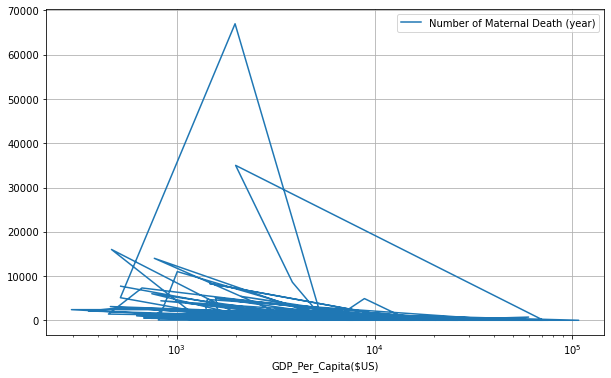

In [250]:

gdppcVsMMDr.plot(x=GDP_Per_Capita, y=MaternalMortality, kind='line', grid=True, logx=True,figsize=(10, 6) )




#A line graph for further visualization. 
Both graphs display similar features concerning the dataset. There is a correlation as far the year 2017 is concerned however there are some ectreme outliers.

In [251]:
print(gdppcVsMMDr.max())
print(gdppcVsMMDr.min())

country                            Zimbabwe
GDP_Per_Capita($US)                  107627
Number of Maternal Death (year)       67000
dtype: object
country                            Afghanistan
GDP_Per_Capita($US)                        293
Number of Maternal Death (year)              0
dtype: object


In [252]:
#print(gdppcVsMMDr.mean())

The plots shows there is clear correlation: most odf the countries with high GDP per capita have zero to low maternal death however there some outliers like Nigeria and India with low life expectancy, Many of the the poor countries have issue of high numnber of maternal death. GDP per capita is therefore a good indicator of life expectancy as well as maternal death prevention..


In [256]:
# the 10 countries with lowest GDP
gdppcVsMMDr.sort_values(GDP_Per_Capita).head(10)

,country,GDP_Per_Capita($US),Number of Maternal Death (year)
26,Burundi,293,2400
98,Malawi,357,2100
31,Central African Republic,451,1400
111,Mozambique,461,3100
37,"Congo, Dem. Rep.",467,16000
142,Sierra Leone,499,2900
97,Madagascar,515,2800
118,Niger,518,5100
0,Afghanistan,520,7700
160,Togo,626,1000


In [258]:
# the 10 countries with lowest Number of maternal death
gdppcVsMMDr.sort_values(MaternalMortality).head(10)

,country,GDP_Per_Capita($US),Number of Maternal Death (year)
64,Grenada,10153,0
96,Luxembourg,107627,0
102,Malta,28092,0
109,Montenegro,7784,0
72,Iceland,71311,0
43,Cyprus,26339,1
161,Tonga,4514,1
121,Norway,75497,1
151,St. Vincent and the Grenadines,7213,1
13,Barbados,17391,1


In [260]:
# the 10 countries with highest Number of maternal death
gdppcVsMMDr.sort_values(MaternalMortality).tail(10)

,country,GDP_Per_Capita($US),Number of Maternal Death (year)
166,Uganda,747,6000
32,Chad,666,7300
0,Afghanistan,520,7700
123,Pakistan,1465,8300
74,Indonesia,3838,8600
157,Tanzania,1005,11000
54,Ethiopia,769,14000
37,"Congo, Dem. Rep.",467,16000
73,India,1982,35000
119,Nigeria,1969,67000


Comparing the 10 poorest countries, the 10 countries with the lowest and highest maternal death shows that GDPCC is although a crude measure can also serve as a good indicator. However The population size should be taken into account for future studies.  

### COMPARING BEWTEEN GDP AND LIFE EXPECTANCY AND GDP PER CAPITA AND NUMBER OF MATERNAL HEALTH(another indicator of life expectancy).

GDP is not an effective indicator to measure life expectancy in camparism to GDP per capita as ther correlation was not strong enough compared to when GDP Per capita is uesd as an indicator.



## CONCLUSION:
    GDP Per capita is good indicator of life expectancy as well as maternal health and survival. Countries should work on improving their economies and boost the standard of living and purchasing of their citizens. 